In [13]:
from scipy import *  
from scipy.linalg import norm, pinv  
from matplotlib import pyplot as plt 

<ipython-input-18-0df1370f5667>:47: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  y = sin(3*(x+0.5)**3 - 1)
<ipython-input-18-0df1370f5667>:18: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  G = zeros((X.shape[0], self.numCenters), float)
<ipython-input-18-0df1370f5667>:15: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return exp(-self.beta * norm(c-d)**2)
<ipython-input-18-0df1370f5667>:36: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  self.W = dot(pinv(G), Y)
<ipython-input-18-0df1370f5667>:40: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  Y = dot(G, self.W)


center [array([-0.35353535]), array([0.49494949]), array([0.07070707]), array([0.61616162]), array([0.37373737]), array([-0.27272727]), array([0.81818182]), array([0.09090909]), array([-0.51515152]), array([-0.49494949])]
[[3.53190672e-02 1.71890731e-08 1.03980305e-04 8.41506855e-10
  2.77558261e-07 1.45319594e-02 3.26983696e-12 7.33211715e-05
  1.52494854e-01 1.29949664e-01]
 [4.33851086e-02 2.77774606e-08 1.46499742e-04 1.41420789e-09
  4.31299270e-07 1.83231154e-02 5.86598424e-12 1.03980305e-04
  1.77786712e-01 1.52494854e-01]
 [5.29463752e-02 4.45960818e-08 2.05062720e-04 2.36120088e-09
  6.65836147e-07 2.29529515e-02 1.04548972e-11 1.46499742e-04
  2.05924246e-01 1.77786712e-01]
 [6.41942099e-02 7.11319879e-08 2.85167907e-04 3.91666743e-09
  1.02122184e-06 2.85655008e-02 1.85123998e-11 2.05062720e-04
  2.36962572e-01 2.05924246e-01]
 [7.73249349e-02 1.12719037e-07 3.93984070e-04 6.45452870e-09
  1.55609784e-06 3.53190672e-02 3.25664002e-11 2.85167907e-04
  2.70904428e-01 2.3696257

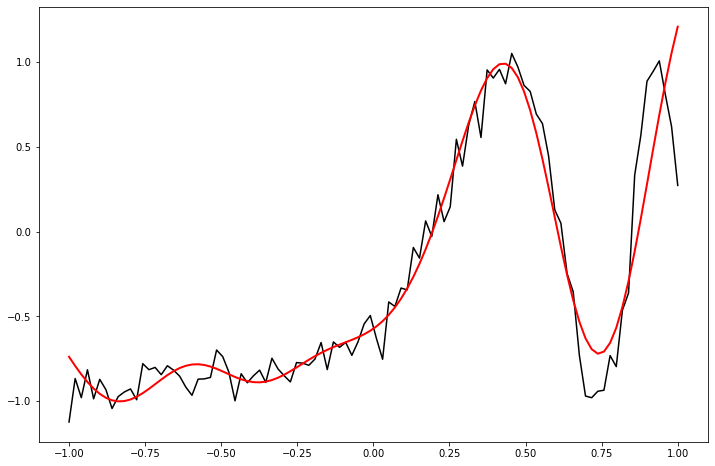

In [18]:
class RBF:  
    def __init__(self, indim, numCenters, outdim):  
        self.indim = indim  
        self.outdim = outdim  
        self.numCenters = numCenters  
        #Here we initialize the center corresponding to the hidden neuron of RBF
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]  
                 #Here we are two important parameters that define the RBF network..
                 #The first parameter represents β, the second represents the connection weight
        self.beta = 8  
        self.W = random.random((self.numCenters, self.outdim))  
           
    def _basisfunc(self, c, d):  
        assert len(d) == self.indim  
        return exp(-self.beta * norm(c-d)**2)  
    def _calcAct(self, X):  
        # calculate activations of RBFs  
        G = zeros((X.shape[0], self.numCenters), float)  
        for ci, c in enumerate(self.centers):  
            for xi, x in enumerate(X):  
                G[xi,ci] = self._basisfunc(c, x)  
        return G  
         #Pass x and y values for training   
    def train(self, X, Y):  
        """ X: matrix of dimensions n x indim  
            y: column vector of dimension n x 1 """  
          # choose random center vectors from training set  
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]  
        self.centers = [X[i,:] for i in rnd_idx]  
                 #The center of operation is: [76 21 58 61 2 1 64 77 34 33]   
        print ("center", self.centers)  
        # calculate activations of RBFs  
        G = self._calcAct(X)  
        print (G)  
         # calculate output weights (pseudoinverse)  
        self.W = dot(pinv(G), Y)  
    def test(self, X):  
        """ X: matrix of dimensions n x indim """  
        G = self._calcAct(X)  
        Y = dot(G, self.W)  
        return Y  
if __name__ == '__main__':  
    n = 100  
    x = mgrid[-1:1:complex(0,n)].reshape(n, 1)  
    #print(x)
    # set y and add random noise  
    y = sin(3*(x+0.5)**3 - 1)  
    y += random.normal(0, 0.1, y.shape)  
    # rbf regression  
    rbf = RBF(1, 10, 1)  
    rbf.train(x, y)  
    z = rbf.test(x)  
        # plot original data  
    plt.figure(figsize=(12, 8))  
    plt.plot(x, y, 'k-')  
        # plot learned model  
    plt.plot(x, z, 'r-', linewidth=2)  
    plt.show()